In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("covid_19_world.csv",parse_dates=["Date"])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.rename(columns={"Date":"date","Province/State":"state","Country/Region":"country","Lat":"lat",
                  "Long":"long","Confirmed":"confirmed","Deaths":"deaths","Recovered":"recovered"},inplace=True)

In [ ]:
df.columns

Index(['state', 'country', 'lat', 'long', 'date', 'confirmed', 'deaths',
       'recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
df['active'] = df["confirmed"] - df["deaths"] -df["recovered"]

In [ ]:
df.iloc[9:12,:]

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific,0
10,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,Western Pacific,0
11,Queensland,Australia,-27.4698,153.0251,2020-01-22,0,0,0,0,Western Pacific,0


In [ ]:
top = df[df["date"]==df['date'].max()]
display( top)

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
44892,NaN,Afghanistan,33.939110,67.709953,2020-12-07,34451,1010,21216,12225,Eastern Mediterranean,12225
44893,NaN,Albania,41.153300,20.168300,2020-12-07,3454,93,1946,1415,Europe,1415
44894,NaN,Algeria,28.033900,1.659600,2020-12-07,19195,1011,13743,4441,Africa,4441
44895,NaN,Andorra,42.506300,1.521800,2020-12-07,855,52,803,0,Europe,0
44896,NaN,Angola,-11.202700,17.873900,2020-12-07,506,26,118,362,Africa,362
...,...,...,...,...,...,...,...,...,...,...,...
45148,NaN,Sao Tome and Principe,0.186400,6.613100,2020-12-07,729,14,286,429,Africa,429
45149,NaN,Yemen,15.552727,48.516388,2020-12-07,1465,417,659,389,Eastern Mediterranean,389
45150,NaN,Comoros,-11.645500,43.333300,2020-12-07,317,7,296,14,Africa,14
45151,NaN,Tajikistan,38.861000,71.276100,2020-12-07,6552,55,5228,1269,Europe,1269


In [ ]:
top.tail()

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
45148,NaN,Sao Tome and Principe,0.186400,6.613100,2020-12-07,729,14,286,429,Africa,429
45149,NaN,Yemen,15.552727,48.516388,2020-12-07,1465,417,659,389,Eastern Mediterranean,389
45150,NaN,Comoros,-11.645500,43.333300,2020-12-07,317,7,296,14,Africa,14
45151,NaN,Tajikistan,38.861000,71.276100,2020-12-07,6552,55,5228,1269,Europe,1269
45152,NaN,Lesotho,-29.610000,28.233600,2020-12-07,233,2,32,199,Africa,199


In [ ]:
world = df.groupby("country")["confirmed","active","deaths","date"].sum().reset_index()
world

,country,confirmed,active,deaths
0,Afghanistan,1936390,1089052,49098
1,Albania,196702,72117,5708
2,Algeria,1179755,345886,77972
3,Andorra,94404,19907,5423
4,Angola,22662,15011,1078
...,...,...,...,...
182,West Bank and Gaza,233461,170967,1370
183,Western Sahara,901,190,63
184,Yemen,67180,25694,17707
185,Zambia,129421,43167,2643


In [ ]:
total_cases = df.groupby("date")["date","confirmed"].sum().reset_index()
total_cases

,date,confirmed
0,2020-01-02,12038
1,2020-01-03,87690
2,2020-01-04,947569
3,2020-01-05,3355922
4,2020-01-06,6280725
...,...,...
183,2020-12-03,131603
184,2020-12-04,1845653
185,2020-12-05,4263867
186,2020-12-06,7654725


[Text(0, 0.5, 'Total cases'), Text(0.5, 0, 'Dates')]

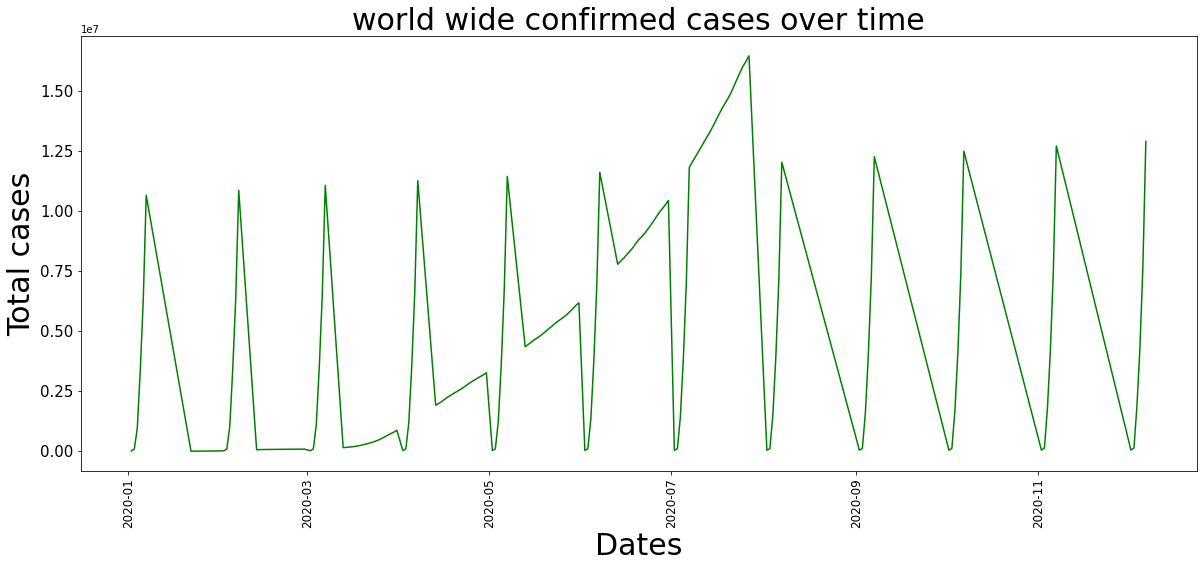

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Confirmed",fontsize=30)
plt.title("world wide confirmed cases over time",fontsize=30)
ax=sns.lineplot(x = total_cases.date.dt.date, y = total_cases.confirmed, color="g")
ax.set(xlabel="Dates",ylabel="Total cases")

In [ ]:
top_actives = df.groupby("country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

,country,active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


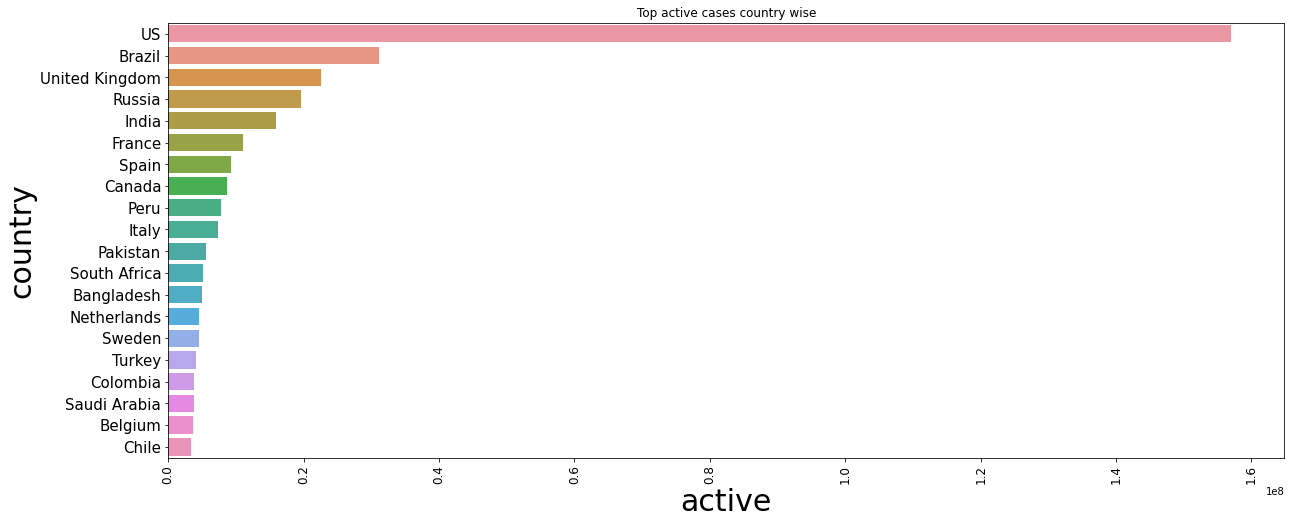

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("Active",fontsize=30)
plt.ylabel("country",fontsize=30)
plt.title("Top active cases country wise")
ax = sns.barplot(x= top_actives.active, y= top_actives.country)


In [ ]:
china = df[df.country=="China"]
china

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific,1
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific,14
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific,6
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific,1
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific,0
...,...,...,...,...,...,...,...,...,...,...,...
48883,Tianjin,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific,6
48884,Tibet,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific,0
48885,Xinjiang,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific,235
48886,Yunnan,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific,2


In [ ]:
china.groupby("date")["confirmed","deaths","recovered","Active"].sum().reset_index()

,date,confirmed,deaths,recovered,Active
0,2020-01-02,11891,259,272,11360
1,2020-01-03,79932,2872,40670,36390
2,2020-01-04,82361,3316,74844,4201
3,2020-01-05,83959,4637,77001,2321
4,2020-01-06,84154,4638,77822,1694
...,...,...,...,...,...
183,2020-12-03,80932,3172,61344,16416
184,2020-12-04,83134,3343,76390,3401
185,2020-12-05,84018,4637,77647,1734
186,2020-12-06,84228,4638,77896,1694


In [ ]:
usa = df[df.country=="US"]
usa

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas,1
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas,1
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas,2
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas,2
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas,5
...,...,...,...,...,...,...,...,...,...,...,...
47986,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas,2661117
48247,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas,2705347
48508,NaN,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas,2753091
48769,NaN,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas,2789125


In [ ]:
usa=usa.groupby("date")["confirmed","deaths","recovered","active"].sum().reset_index()
usa

In [ ]:
usa= usa.iloc[33:].reset_index().drop("index",axis=1)
usa

,date,confirmed,deaths,recovered,active
0,2020-03-25,66055,1333,361,64361
1,2020-03-26,84091,1746,681,81664
2,2020-03-27,102276,2300,869,99107
3,2020-03-28,122069,2934,1072,118063
4,2020-03-29,141205,3561,2665,134979
...,...,...,...,...,...
117,2020-12-03,1561,43,12,1506
118,2020-12-04,556522,26548,32988,496986
119,2020-12-05,1375152,83483,230287,1061382
120,2020-12-06,2048986,115334,547386,1386266


In [ ]:
italy = df[df.country=="Italy"]
italy = italy.groupby("date")["confirmed","deaths","recovered","active"].sum().reset_index()
italy = italy.iloc[9:].reset_index().drop("index",axis=1)
italy

,date,confirmed,deaths,recovered,active
0,2020-01-25,0,0,0,0
1,2020-01-26,0,0,0,0
2,2020-01-27,0,0,0,0
3,2020-01-28,0,0,0,0
4,2020-01-29,0,0,0,0
...,...,...,...,...,...
174,2020-12-03,15113,1016,1045,13052
175,2020-12-04,156363,19899,34211,102253
176,2020-12-05,221216,30911,109039,81266
177,2020-12-06,236305,34223,173085,28997


In [ ]:
india=df[df.country=="India"]
india=india.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
india=india.iloc[8:].reset_index().drop("index",axis=1)
india

,date,recovered,deaths,confirmed,active
0,2020-01-24,0,0,0,0
1,2020-01-25,0,0,0,0
2,2020-01-26,0,0,0,0
3,2020-01-27,0,0,0,0
4,2020-01-28,0,0,0,0
...,...,...,...,...,...
175,2020-12-03,4,1,73,68
176,2020-12-04,1080,331,9205,7794
177,2020-12-05,24420,2415,74292,47457
178,2020-12-06,154330,8884,308993,145779


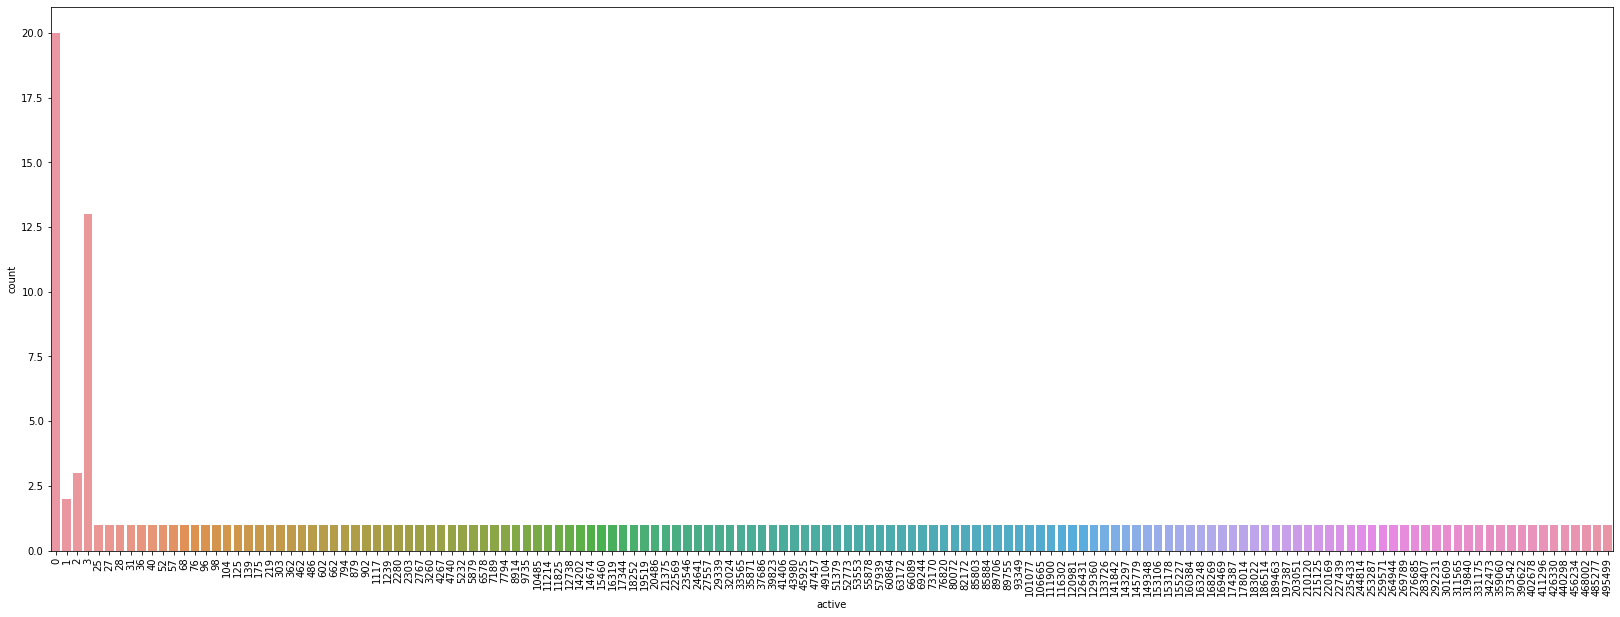

In [ ]:
plt.figure(figsize=(28,10))
s1 = sns.countplot(india.active)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
s1

# Detailed Analysis Of covid cases in India

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("covid_19_india.csv",parse_dates=["Date"])
data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
3346,3347,2020-06-22,8:00 AM,Tripura,-,-,782,1,1237
3347,3348,2020-06-22,8:00 AM,Uttarakhand,-,-,1521,28,2402
3348,3349,2020-06-22,8:00 AM,Uttar Pradesh,-,-,11601,569,18322
3349,3350,2020-06-22,8:00 AM,West Bengal,-,-,8687,569,14358


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       3351 non-null   int64         
 1   Date                      3351 non-null   datetime64[ns]
 2   Time                      3351 non-null   object        
 3   State/UnionTerritory      3351 non-null   object        
 4   ConfirmedIndianNational   3351 non-null   object        
 5   ConfirmedForeignNational  3351 non-null   object        
 6   Cured                     3351 non-null   int64         
 7   Deaths                    3351 non-null   int64         
 8   Confirmed                 3351 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 235.7+ KB


In [ ]:
kerala = data[data.state=="Kerala"]
kerala

In [ ]:
kerala= kerala.groupby("date")["ConfirmedIndianNational"].sum().reset_index()
kerala

In [ ]:
data["State/UnionTerritory"].value_counts()

Kerala                                      146
Delhi                                       114
Rajasthan                                   113
Uttar Pradesh                               112
Haryana                                     112
Ladakh                                      109
Tamil Nadu                                  109
Maharashtra                                 107
Jammu and Kashmir                           107
Punjab                                      107
Karnataka                                   107
Andhra Pradesh                              104
Telengana                                   102
Uttarakhand                                 101
Odisha                                      100
Puducherry                                   98
West Bengal                                  98
Chhattisgarh                                 97
Chandigarh                                   97
Gujarat                                      96
Madhya Pradesh                          

In [ ]:
data1 = data.loc[data["State/UnionTerritory"].isin(["Delhi","Ladakh","Chandigarh","Andaman and Nicobar Islands","Dadar Nagar Haveli","Daman & Diu","Dadra and Nagar Haveli and Daman and Diu","Jammu and Kashmir"])].reset_index()
data1

,index,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,34,35,2020-02-03,6:00 PM,Delhi,1,0,0,0,1
1,38,39,2020-03-03,6:00 PM,Delhi,1,0,0,0,1
2,42,43,2020-04-03,6:00 PM,Delhi,1,0,0,0,1
3,45,46,2020-05-03,6:00 PM,Delhi,2,0,0,0,2
4,51,52,2020-06-03,6:00 PM,Delhi,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
562,3320,3321,2020-06-22,8:00 AM,Chandigarh,-,-,322,6,411
563,3322,3323,2020-06-22,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,-,-,27,0,91
564,3323,3324,2020-06-22,8:00 AM,Delhi,-,-,36602,2233,62655
565,3328,3329,2020-06-22,8:00 AM,Jammu and Kashmir,-,-,3531,85,6088


In [ ]:
data1.rename(columns={"State/UnionTerritory":"UnionTerritory"})

,index,Sno,Date,Time,UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,34,35,2020-02-03,6:00 PM,Delhi,1,0,0,0,1
1,38,39,2020-03-03,6:00 PM,Delhi,1,0,0,0,1
2,42,43,2020-04-03,6:00 PM,Delhi,1,0,0,0,1
3,45,46,2020-05-03,6:00 PM,Delhi,2,0,0,0,2
4,51,52,2020-06-03,6:00 PM,Delhi,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
562,3320,3321,2020-06-22,8:00 AM,Chandigarh,-,-,322,6,411
563,3322,3323,2020-06-22,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,-,-,27,0,91
564,3323,3324,2020-06-22,8:00 AM,Delhi,-,-,36602,2233,62655
565,3328,3329,2020-06-22,8:00 AM,Jammu and Kashmir,-,-,3531,85,6088


In [ ]:
data2 = data.loc[~data["State/UnionTerritory"].isin(["Delhi","Ladakh","Chandigarh","Andaman and Nicobar Islands","Dadar Nagar Haveli","Daman & Diu","Dadra and Nagar Haveli and Daman and Diu","Jammu and Kashmir"])].reset_index()
data2

,index,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
2779,3346,3347,2020-06-22,8:00 AM,Tripura,-,-,782,1,1237
2780,3347,3348,2020-06-22,8:00 AM,Uttarakhand,-,-,1521,28,2402
2781,3348,3349,2020-06-22,8:00 AM,Uttar Pradesh,-,-,11601,569,18322
2782,3349,3350,2020-06-22,8:00 AM,West Bengal,-,-,8687,569,14358


In [ ]:
data2.rename(columns={"State/UnionTerritory":"State"})

,index,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
2779,3346,3347,2020-06-22,8:00 AM,Tripura,-,-,782,1,1237
2780,3347,3348,2020-06-22,8:00 AM,Uttarakhand,-,-,1521,28,2402
2781,3348,3349,2020-06-22,8:00 AM,Uttar Pradesh,-,-,11601,569,18322
2782,3349,3350,2020-06-22,8:00 AM,West Bengal,-,-,8687,569,14358
